In [1]:
# download data from https://cellxgene.cziscience.com/collections/348da6dc-5bf6-435d-adc5-37747b9ae38a
import os, sys
HOMEDIR = os.path.expanduser("~")
PROJDIR = rf"{HOMEDIR}/G-scIB_dev"
sys.path.append(rf"{PROJDIR}/src")

import Data_Handler as dh, Utils_Handler as uh, Vis_Handler as vh
import umap, numpy as np, pandas as pd, scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.settings.verbosity = 3

In [2]:
adata = sc.read_h5ad(dh.DATA_EMB_["eye"])
obsm_keys = list(adata.obsm)
for embed in obsm_keys:
    print("%12s, %d" % (embed, adata.obsm[embed].shape[1]))
    assert adata.obsm[embed].shape[0] == np.unique(adata.obsm[embed], axis=0).shape[0]

     Harmony, 50
Provided_x_umap, 2
   Scanorama, 100
     X_bbknn, 2
       X_pca, 50
    X_scANVI, 30
      X_scVI, 30
      X_tsne, 2
      X_umap, 2
      scPoli, 10


In [3]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat_v3", n_top_genes=1000)
adata

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


AnnData object with n_obs × n_vars = 48981 × 1000
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', 'conditions_combined'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'log1p', 'neighbors', 'schema_version', 'title', 'tsne', 'umap', 'hvg'
    obsm: 'Harmony', 'Provided_x_umap', 'Scanorama', 'X_bbknn', 'X_pca', 'X_scANVI', 'X_scVI', 'X_

In [4]:
adata.write(rf"{dh.DATA_DIR}/eye/emb_hvg.h5ad", compression="gzip")

### Process with Raw Data

In [2]:
adata = sc.read_h5ad(dh.DATA_RAW_["eye"])

In [3]:
adata

AnnData object with n_obs × n_vars = 51645 × 36484
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title'
    obsm: 'X_UMAP'

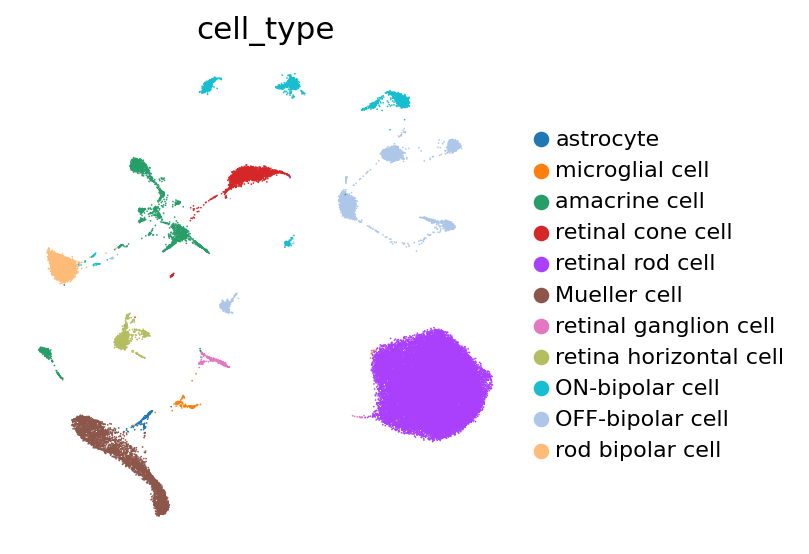

In [4]:
sc.pl.embedding(adata, basis="X_UMAP", color=["cell_type"], **vh.cfg)

In [5]:
adata.raw

In [6]:
adata.X = adata.raw.X
del adata.raw

In [7]:
adata

AnnData object with n_obs × n_vars = 51645 × 36484
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title', 'cell_type_colors'
    obsm: 'X_UMAP'

In [8]:
uh.preprocess(adata)

filtered out 2664 cells that have less than 1000 counts
filtered out 6811 genes that are detected in less than 5 cells
29673 genes x 48981 cells after quality control.
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 48981 × 29673
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'schema_version', 'title', 'cell_type_colors', 'log1p'
    obsm: 'X_UMAP'

In [10]:
uh.umaps_rawcounts(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:01:11)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:51)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:34)


AnnData object with n_obs × n_vars = 48981 × 29673
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'schema_version', 'title', 'cell_type_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'Provided_x_umap', 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [11]:
adata.write(rf"{dh.DATA_DIR}/Eye/emb.h5ad", compression="gzip")

### Save Metadata

In [3]:
adata = sc.read_h5ad(rf"{dh.DATA_DIR}/Eye/emb.h5ad")

In [9]:
os.makedirs(rf"{dh.META_DIR}/eye/", exist_ok=True)

In [4]:
adata

AnnData object with n_obs × n_vars = 48981 × 29673
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_counts', 'n_genes'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_colors', 'log1p', 'neighbors', 'schema_version', 'title', 'umap'
    obsm: 'Provided_x_umap', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs["biosample_id"].unique()

['LVG1_retina_OD', 'LVG1_retina_OS', 'LGS1_retina_OD', 'LGS1_retina_OS', 'LGS2_retina_OD', 'LGS2_retina_OS', 'LGS3_retina_OD', 'LGS3_retina_OS']
Categories (8, object): ['LGS1_retina_OD', 'LGS1_retina_OS', 'LGS2_retina_OD', 'LGS2_retina_OS', 'LGS3_retina_OD', 'LGS3_retina_OS', 'LVG1_retina_OD', 'LVG1_retina_OS']

In [6]:
adata.obs["donor_id"].unique()

['LVG1', 'LGS1', 'LGS2', 'LGS3']
Categories (4, object): ['LGS1', 'LGS2', 'LGS3', 'LVG1']

In [10]:
import json
CELL2CAT = dict()
for idx, batch in enumerate(adata.obs["cell_type"].unique()):
    CELL2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/eye/cell2cat.json", "w")
_file.write(json.dumps(CELL2CAT))
_file.close()

BATCH2CAT = dict()
for idx, batch in enumerate(adata.obs["biosample_id"].unique()):
    BATCH2CAT[batch] = idx
_file = open(rf"{dh.META_DIR}/eye/batch2cat.json", "w")
_file.write(json.dumps(BATCH2CAT))
_file.close()

### Deprecated (for Sanity Check)

In [8]:
_list = list(adata.obs.keys())

for _obsm in _list:
    if _obsm not in ["biosample_id", "cell_type"]:
        del adata.obs[_obsm]

del adata.var['feature_is_filtered']
del adata.var['feature_reference']
del adata.var['feature_biotype']
del adata.uns['schema_version']
del adata.uns['title']

In [9]:
adata

AnnData object with n_obs × n_vars = 51645 × 36484
    obs: 'biosample_id', 'cell_type'
    var: 'feature_name'
    uns: 'cell_type_colors'
    obsm: 'X_UMAP'

In [10]:
bdata = adata.copy()

In [11]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [12]:
adata

AnnData object with n_obs × n_vars = 51645 × 36484
    obs: 'biosample_id', 'cell_type', 'n_counts'
    var: 'feature_name'
    uns: 'cell_type_colors', 'log1p'
    obsm: 'X_UMAP'

In [13]:
from scipy.sparse import diags

In [14]:
# Store counts per cell to reverse normalization later
counts_per_cell = np.sum(adata.X, axis=1).A1  # .A1 converts matrix to 1D ndarray
# Reverse Transformations
# Step 1: Reverse log1p, exp(x) - 1
adata.X = np.expm1(adata.X)
# Step 2: Reverse per-cell normalization
scaling_factors = counts_per_cell / 1e4
scaling_matrix = diags(scaling_factors)  # Create a diagonal matrix with scaling_factors
adata.X = scaling_matrix.dot(adata.X)  # Matrix multiplication

In [15]:
adata.X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
uh.compare_sparse_matrices(adata.X, bdata.X)

False

In [17]:
_a = adata.X.toarray()
_b = bdata.X.toarray()

In [18]:
(_a - _b).max()

126.85211

In [ ]:
normed_counts.sum(axis=1)

In [ ]:
size_factors

In [ ]:
(normed_counts * size_factors[:, None])[:10]

In [ ]:
rec_[:10]

In [ ]:
normed_counts

In [ ]:
np.log(normed_counts * size_factors[:, None] + 1)[:10]

In [ ]:
def norm2count(rec_):
    normed_counts = np.exp(rec_) - 1
    size_factors = 1e4 / normed_counts.sum(axis=1)
    return np.log(normed_counts * size_factors[:, None] + 1)

In [ ]:
adata.X = adata.raw.X
del adata.raw
uh.preprocess(adata)

In [ ]:
adata.obs["biosample_id"].unique()

In [ ]:
adata.obs["donor_id"].unique()